In [2]:
#!/usr/bin/env python
"""Download example."""

import ee
import urllib
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import rasterio
%matplotlib inline 

# First run the Earth Engine initialization notebook, if you haven't
# This is located in datalab/docs-earthengine. The datalab folder 
# is the parent folder of the notebooks folder where you are running this notebook. 
# Go back to the file browser and click on the "datalab" folder in the filepath above
# the list of notebooks
ee.Initialize()


# elder = ee.FeatureCollection('users/daviddralle/bioma')
# Get a download URL for an image.
imagename = 'CGIAR/SRTM90_V4'
image1 = ee.Image(imagename)
path = image1.getDownloadUrl({
    'scale': 30,
    'crs': 'EPSG:4326',
    'region': '[[-120, 35], [-119, 35], [-119, 34], [-120, 34]]'
})
# print path
urllib.urlretrieve(path, './' + 'SRTM90_V4' + '.zip')

('./SRTM90_V4.zip', <httplib.HTTPMessage instance at 0x7f6dbf512518>)

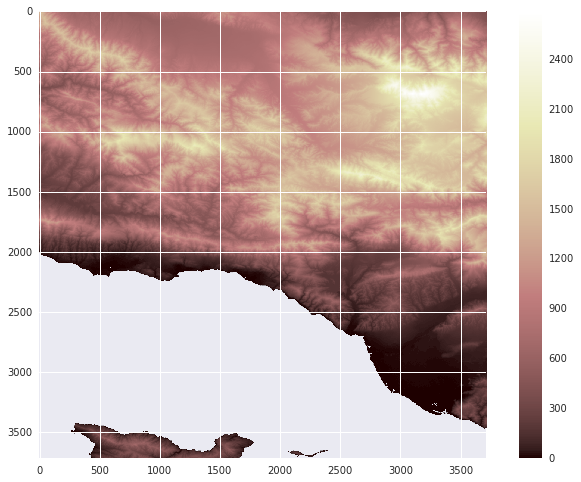

In [3]:
zf = zipfile.ZipFile('./' + 'SRTM90_V4' + '.zip', 'r')
zf.extractall()
rastfile = './SRTM90_V4.elevation.tif'
src = rasterio.open(rastfile)
data = src.read(1).astype(float)
data[data < 0] = np.nan
plt.figure(figsize=(12,8))
plt.imshow(data, cmap='pink')
plt.colorbar()